
---
# BEST FUTURE PRICE NON FOSSIL ENERGY
---
```
*#(PART 3/3 OF MAIN REPORT_CO2_EMISSIONS)*
```



darkgreen.png

> In an attempt to predict which renewable energy source will have the best price in the coming years, I gathered all existing data containing the price of each from the start of their inception. Using linear regression, training, and testing datasets we are able to make future predictions using machine learning. If the model has a good fit and score it will have the possibility to provide a reliable peek into the future prices.

*for more explanation and details see: `REFERENCES`*



---


# Reading In Data


---



In [ ]:
#Importing the usual things and reading in the dataframe.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext google.colab.data_table
from sklearn.linear_model import LinearRegression
#pd.options.display.float_format = '{:.3f}'.format

get_owid_col=['Entity', 'Code', 'Year', 'Bioenergy levelized cost of energy',
       'Geothermal levelized cost of energy',
       'Offshore wind levelized cost of energy',
       'Solar photovoltaic levelized cost of energy',
       'Concentrated solar power levelized cost of energy',
       'Hydropower levelized cost of energy',
       'Onshore wind levelized cost of energy']

renew_colnames=['Entity', 'Code', 'Year', 'Bioenergy','Geothermal','Offshore_wind','Solar_photovoltaic','Concentrated_solar_power','Hydropower','Onshore_wind']

df_cost_energy = pd.read_csv('https://raw.githubusercontent.com/DASH-OF-GLITTER/CO2_Emissions_Report/main/levelized-cost-of-energy.csv')

df_cost_energy_world = df_cost_energy.loc[(df_cost_energy["Entity"] == "World")]


df_cost_energy_world.columns = renew_colnames
df_cost_energy_world.drop(columns=['Entity', 'Code'], inplace=True)
df_cost_energy_world = df_cost_energy_world.sort_values(by='Year')
df_cost_energy_world.reset_index(inplace=True)
df_cost_energy_world = df_cost_energy_world.drop(columns='index')
#display(df_cost_energy_world)


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


<ipython-input-3-3cb589fdd4cb>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cost_energy_world.drop(columns=['Entity', 'Code'], inplace=True)


#  Linear & Polynomial Regression



---


SIMPLE LINEAR REGRESSION

---



_________________________________________________________________________________________________________________________________________________________________________________________________________________________



Bioenergy linear regression model had a weak coefficient of determination likely due to insuffient data.
_________________________________________________________________________________________________________________________________________________________________________________________________________________________



Geothermal linear regression model had a weak coefficient of determination likely due to insuffient data.
_________________________________________________________________________________________________________________________________________________________________________________________________________________________



Offshore_wind linear regression model had a weak coefficient of determination likely due to insuffient data.
_________________

<Figure size 2400x1000 with 0 Axes>

<Figure size 2400x1000 with 0 Axes>

<Figure size 2400x1000 with 0 Axes>

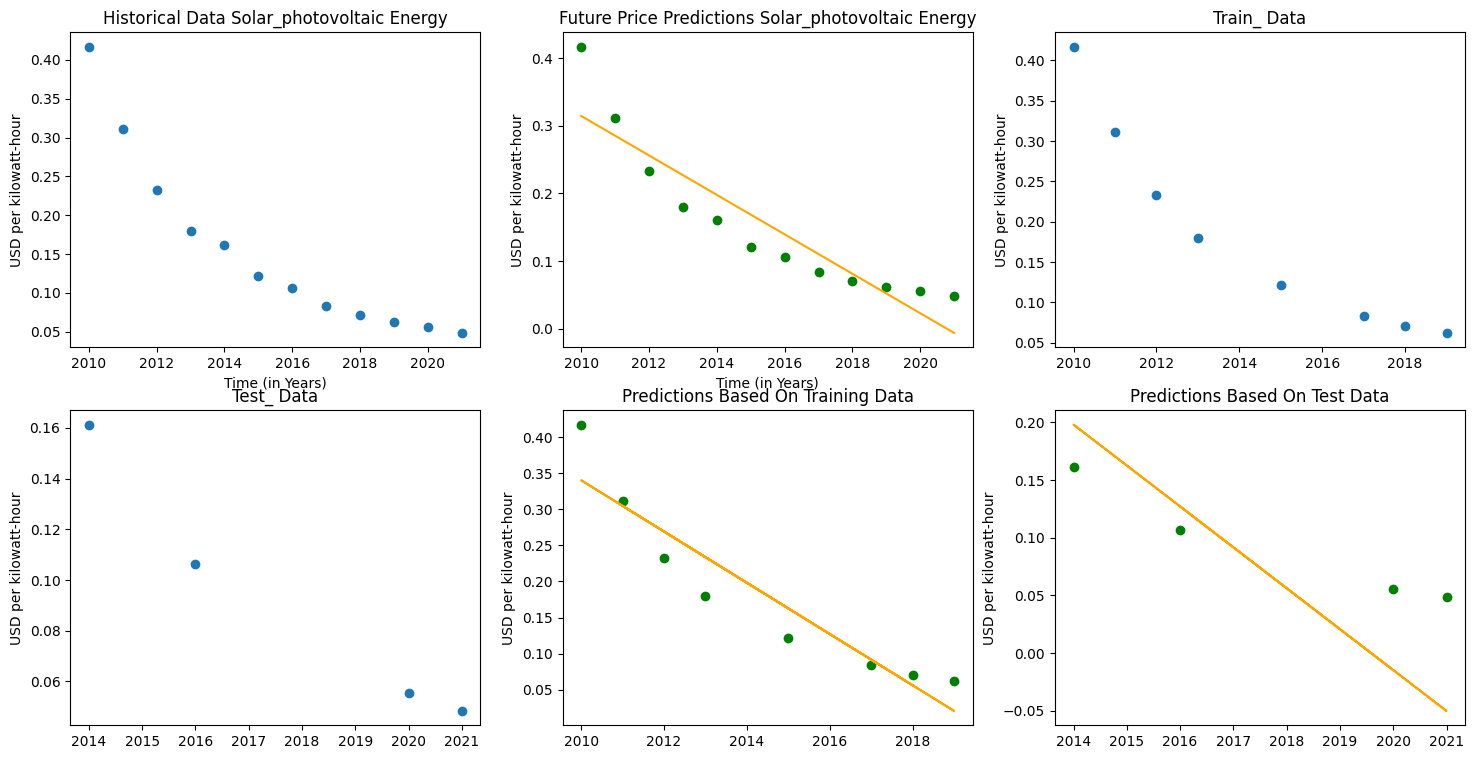

<Figure size 2400x1000 with 0 Axes>

_________________________________________________________________________________________________________________________________________________________________________________________________________________________





_____________Concentrated_solar_power Results______________

Model Coefficient, slope line: 
 [-0.02101696]
________________________________

Coefficient Of Determination, 100% is perfect fit: 86.38%
________________________________

Pearson cor value: 
 0.9294071773571713
________________________________

Mean Absolute Error: the difference between the actual and predicted values on average
________________________________

Training Data MAE: 
 0.024626248978872313
________________________________

Testing Data MAE: 
 0.028778193098594515
________________________________

Price of Concentrated_solar_power in 2025:  [0.03696442]


_____________Concentrated_solar_power Plots____________



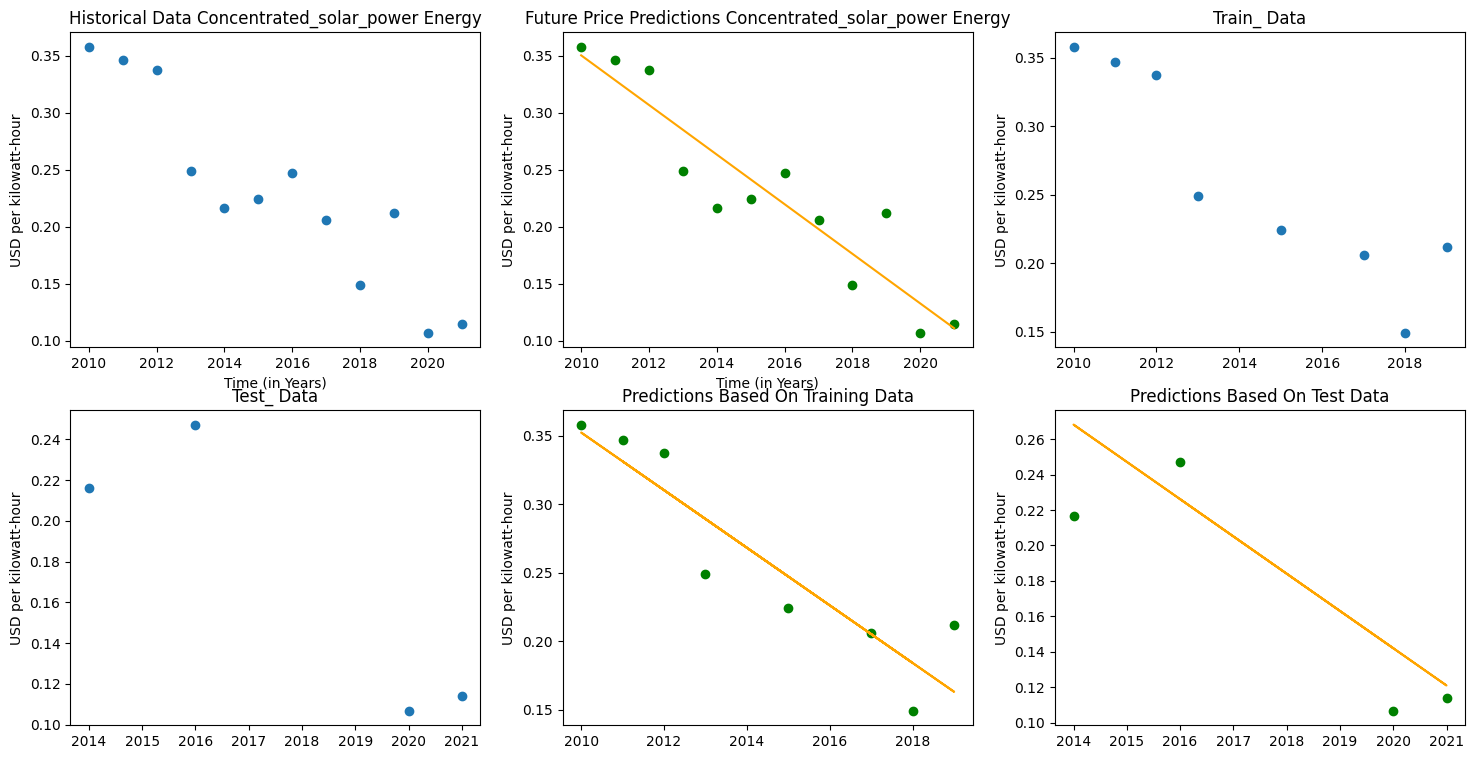

<Figure size 2400x1000 with 0 Axes>

_________________________________________________________________________________________________________________________________________________________________________________________________________________________



Hydropower linear regression model had a weak coefficient of determination likely due to insuffient data.
_________________________________________________________________________________________________________________________________________________________________________________________________________________________





_____________Onshore_wind Results______________

Model Coefficient, slope line: 
 [-0.00670713]
________________________________

Coefficient Of Determination, 100% is perfect fit: 93.55%
________________________________

Pearson cor value: 
 0.9672357358598976
________________________________

Mean Absolute Error: the difference between the actual and predicted values on average
________________________________

Training Data MAE: 
 0.0181152163

<Figure size 2400x1000 with 0 Axes>

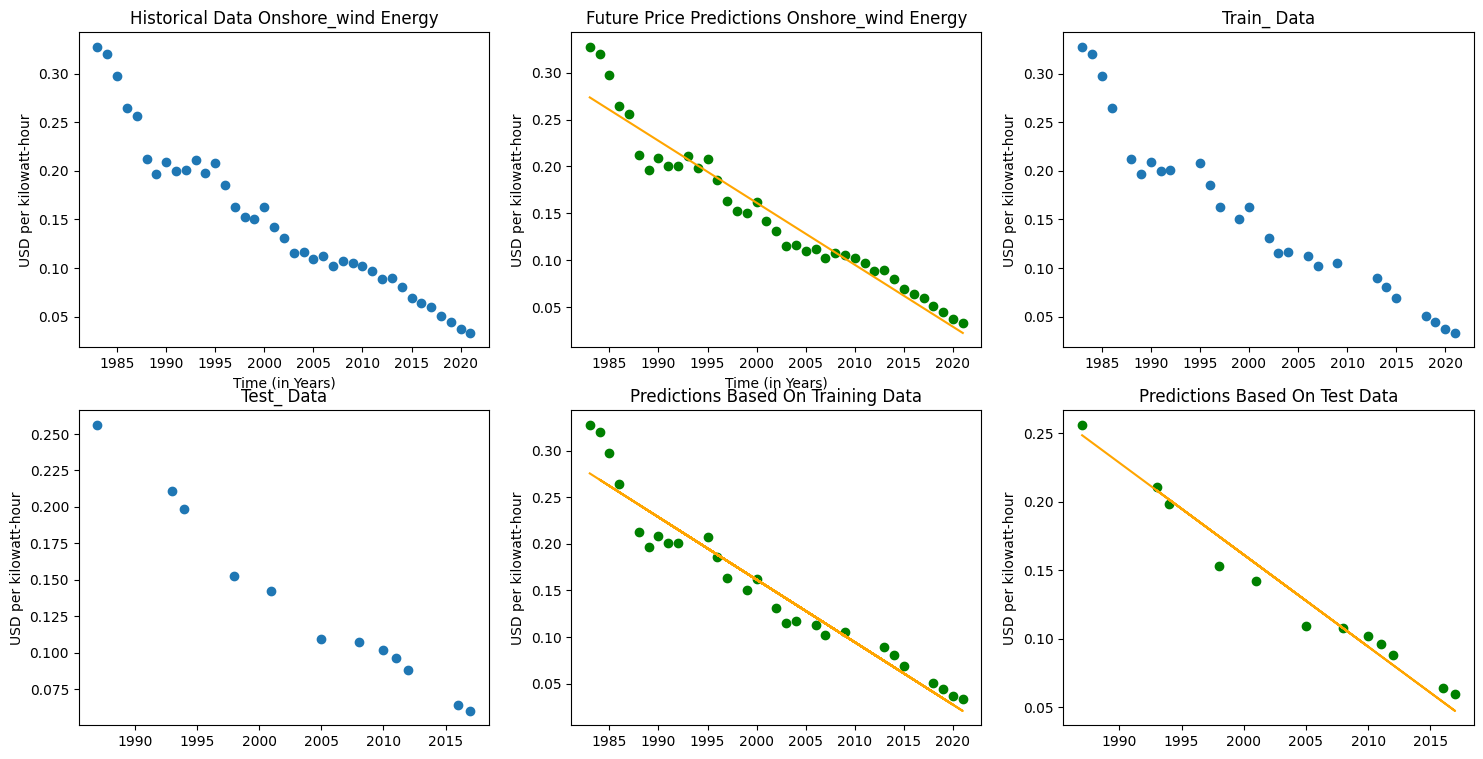

<Figure size 2400x1000 with 0 Axes>

In [ ]:
#Setup data for history of prices for each technology
# create new empy dataframe, object With column names only__________________________________________________________________________
df_energy_min_max = pd.DataFrame(columns = ['Energy_Type', 'Min', 'Max', 'Min_Year'])
df_energy_min_max = df_energy_min_max.astype(dtype={'Energy_Type': str, 'Min':float, 'Max': float, 'Min_Year': str})
#____________________________________________________________________________________________________________________________________


#Performing linear regression for all technologies
#Using test/trani model
def predict_the_future(enrg_type):
  #1 step need to create/setup X dataset
  #Setup X values in a two dimensional array
  df_test = df_cost_energy_world.loc[:,['Year',enrg_type]]
  df_test.dropna(inplace=True)
  df_test.reset_index(drop=True, inplace=True)
  X = df_test.iloc[:,0].values.reshape(-1,1)

  first_year = df_test.loc[0,['Year']].values.tolist()[0]
  first_price = df_test.loc[0,[enrg_type]].values.tolist()[0]
  current_price = df_test.loc[len(df_test.index)-1,[enrg_type]].values.tolist()[0]

  df_energy_min_max.loc[len(df_energy_min_max.index)] = [enrg_type, first_price, current_price, first_year]

  #2 step need to create/setup y dataset, Setup Y values is a single dimensional array_______________________________________________
  y = df_test.iloc[:,1].values

  fig, axs = plt.subplots(2,3,figsize=(18,9))

  #3 Plot Data for X value Years and Y value Onshore Wind
  plt.figure(figsize=(24,10))
  axs[0,0].scatter(X,y)
  axs[0,0].set_title('Historical Data '+ enrg_type +' Energy')
  axs[0,0].set_xlabel('Time (in Years)')
  axs[0,0].set_ylabel('USD per kilowatt-hour')

  #4 Apply Linear Regression (LR)
  lr = LinearRegression()
  model = lr.fit(X,y)

  # LR model is using X(Years) to predict what the value of what Y(Price) will be
  y_pred = model.predict(X)

  model.score(X,y) #R squares - coefficient of determination (identify strength of a model)
  score_of_Xy = model.score(X,y)

  import math
  r = math.sqrt(score_of_Xy)

  #Plotting y_pred data____________________________________________________________________________________________________________
  axs[0,1].plot(X,y,'o', color='green')
  axs[0,1].plot(X,y_pred, color='orange')
  axs[0,1].set_title('Future Price Predictions '+ enrg_type +' Energy')
  axs[0,1].set_xlabel('Time (in Years)')
  axs[0,1].set_ylabel('USD per kilowatt-hour')

  #Importing train test split. 30 % test data 70 % Training data___________________________________________________________________
  from sklearn.model_selection import train_test_split
  X_train_expected, X_test_expected, y_train_expected, y_test_expected = train_test_split(X,y, test_size=.3, random_state = 0)

  #Plotting Training data__________________________________________________________________________________________________________
  axs[0,2].scatter(X_train_expected,y_train_expected)
  axs[0,2].set_title('Train_ Data')
  axs[0,2].set_ylabel('Time (in Years)')
  axs[0,2].set_ylabel('USD per kilowatt-hour')

  #Plotting Testing data__________________________________________________________________________________________________________
  axs[1,0].scatter(X_test_expected,y_test_expected)
  axs[1,0].set_title('Test_ Data')
  axs[1,0].set_ylabel('Time (in Years)')
  axs[1,0].set_ylabel('USD per kilowatt-hour')

  model = lr.fit(X_train_expected, y_train_expected)
  train_score = model.score(X_train_expected, y_train_expected) # R squared on training data

  y_train_pred = model.predict(X_train_expected)

  #Plotting Predictions Based On Training Data___________________________________________________________________________________
  axs[1,1].plot(X_train_expected,y_train_expected,'o', color='green')
  axs[1,1].plot(X_train_expected,y_train_pred, color='orange')
  axs[1,1].set_title('Predictions Based On Training Data')
  axs[1,1].set_ylabel('Time (in Years)')
  axs[1,1].set_ylabel('USD per kilowatt-hour')

  y_test_pred = model.predict(X_test_expected)
  y_test_pred, y_test_expected

  test_score = model.score(X_test_expected, y_test_expected) # R squared on test data

  #Importing mean absolute error________________________________________________________________________________________________
  #difference between the actual and predicted values on average.
  #In general, the lower the MAE, the better the model predicts.
  from sklearn.metrics import mean_absolute_error

  mae_train = mean_absolute_error(y_train_expected, y_train_pred)

  mae_test = mean_absolute_error(y_test_expected, y_test_pred)

  #Plotting Predictions Based On Test Data_______________________________________________________________________________________
  axs[1,2].plot(X_test_expected,y_test_expected,'o', color='green')
  axs[1,2].plot(X_test_expected,y_test_pred, color='orange')
  axs[1,2].set_title('Predictions Based On Test Data')
  axs[1,2].set_ylabel('Time (in Years)')
  axs[1,2].set_ylabel('USD per kilowatt-hour')
  #plt.subplot(2,3,5)

  #Predicting the price of an energy in the future
  y_pred = model.predict([[2025]])
  y_pred

  #___________________________________PRINTING________________________________________
  print("_________________________________________________________________________________________________________________________________________________________________________________________________________________________\n")
  print("\n")
  if (score_of_Xy >= .5):

    print("\n")
    print("_____________"+ enrg_type +" Results______________\n")
    print("Model Coefficient, slope line: \n", model.coef_)
    print("________________________________\n")
    print(F"Coefficient Of Determination, 100% is perfect fit: {score_of_Xy:.2%}")
    print("________________________________\n")
    print("Pearson cor value: \n", r)
    print("________________________________\n")
    print("Mean Absolute Error: the difference between the actual and predicted values on average")
    print("________________________________\n")
    print("Training Data MAE: \n", mae_train)
    print("________________________________\n")
    print('Testing Data MAE: \n', mae_test)
    print("________________________________\n")
    print("Price of "+ enrg_type +" in 2025: ", y_pred )
    print("\n")
    print("_____________"+ enrg_type +" Plots____________\n")
    plt.show()


  else:
    print(enrg_type +" linear regression model had a weak coefficient of determination likely due to insuffient data.")
    plt.close(fig)

Power_Choice = ['Bioenergy', 'Geothermal', 'Offshore_wind',
       'Solar_photovoltaic', 'Concentrated_solar_power', 'Hydropower',
       'Onshore_wind']

for Power in Power_Choice:
  predict_the_future(Power)


#df_energy_min_max dataframe, changing dtypes, splitting string_______________________________________________
df_energy_min_max = df_energy_min_max.astype(dtype={'Energy_Type': str, 'Min':float, 'Max': float, 'Min_Year': str})
df_energy_min_max.Min_Year = df_energy_min_max.Min_Year.str.split('.').str.get(0)
df_energy_min_max.Min = df_energy_min_max.Min.round(2)#.map('$ {}'.format)
df_energy_min_max.Max = df_energy_min_max.Max.round(2)#.map('$ {}'.format)



---


POLYNOMIAL REGRESSION

---



Poly Degree:  1
Price in 2025: [0.06521881]
MAE:  0.006925790381507411
r2:  0.034697347921774147
Poly Degree:  2
Price in 2025: [0.05607013]
MAE:  0.006860906086078678
r2:  0.0552669933323644
Poly Degree:  3
Price in 2025: [0.09413804]
MAE:  0.0066187340467751855
r2:  0.09940610075744427


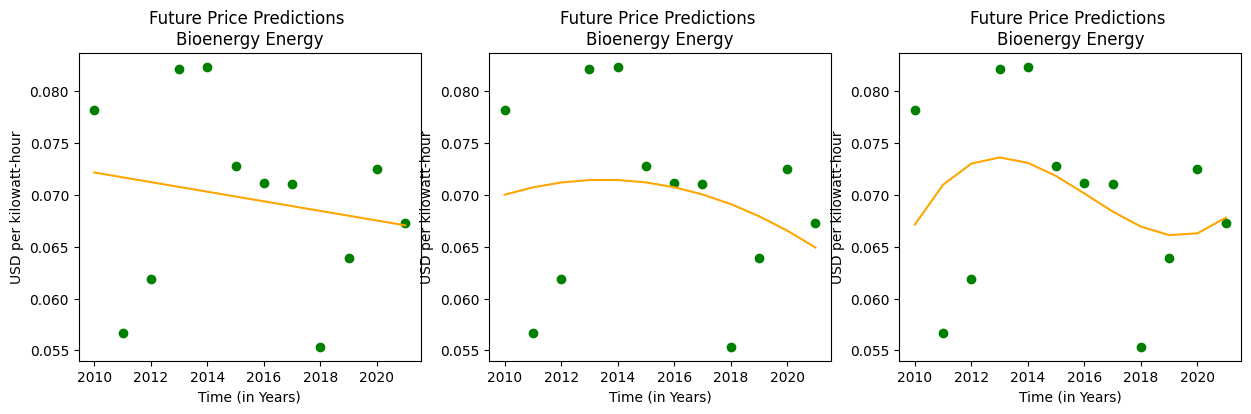

Poly Degree:  1
Price in 2025: [0.06651322]
MAE:  0.00871417831987167
r2:  0.0006213409001852854
Poly Degree:  2
Price in 2025: [0.04666726]
MAE:  0.008801858231700795
r2:  0.0725318736317031
Poly Degree:  3
Price in 2025: [0.09918277]
MAE:  0.008717018394695752
r2:  0.14940557377329


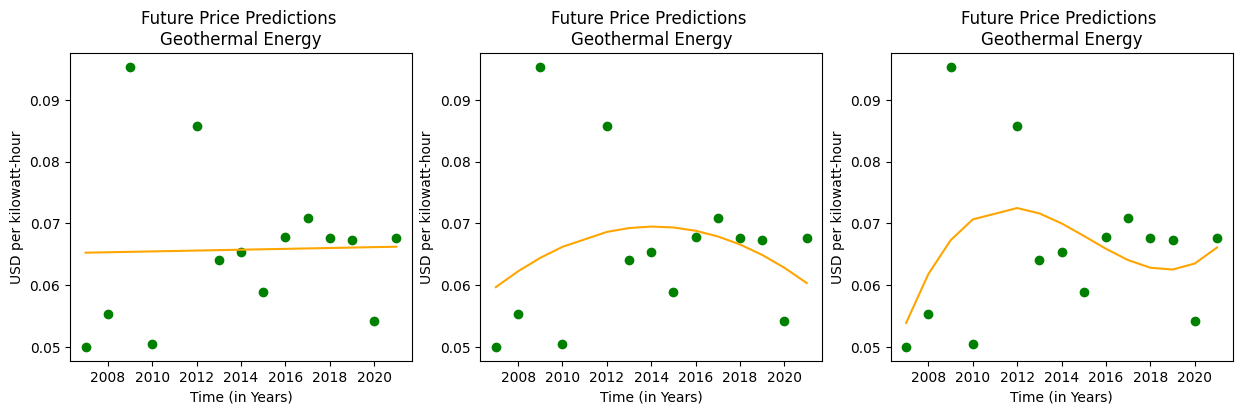

Poly Degree:  1
Price in 2025: [0.09538437]
MAE:  0.029523518213130758
r2:  0.3445643093178318
Poly Degree:  2
Price in 2025: [-0.02690129]
MAE:  0.01720479153018721
r2:  0.7521305141748974
Poly Degree:  3
Price in 2025: [-0.03912655]
MAE:  0.017371416229846434
r2:  0.7530283040777329


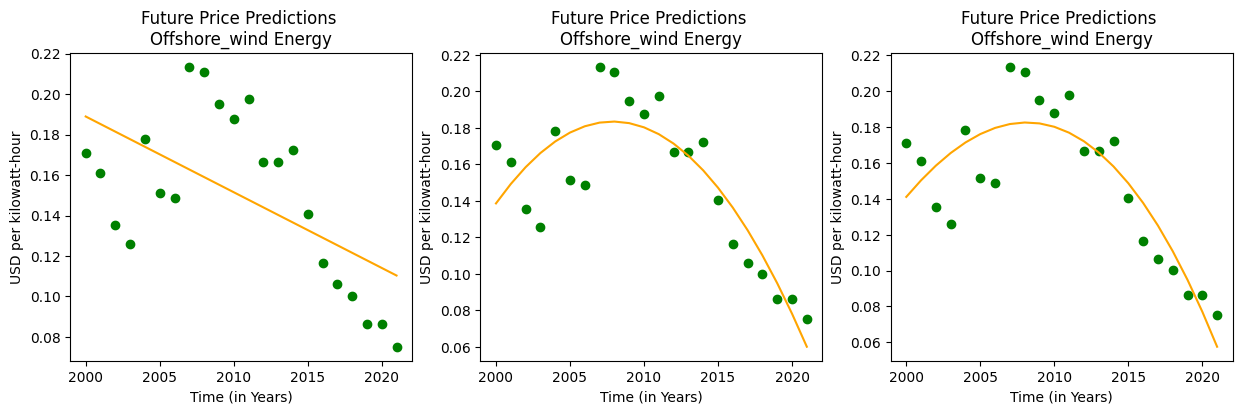

Poly Degree:  1
Price in 2025: [-0.12293782]
MAE:  0.037610779124320946
r2:  0.8369556634952902
Poly Degree:  2
Price in 2025: [0.18507377]
MAE:  0.012779352002779208
r2:  0.9789185870329637
Poly Degree:  3
Price in 2025: [-0.1152603]
MAE:  0.006380589817874173
r2:  0.9956466630535457


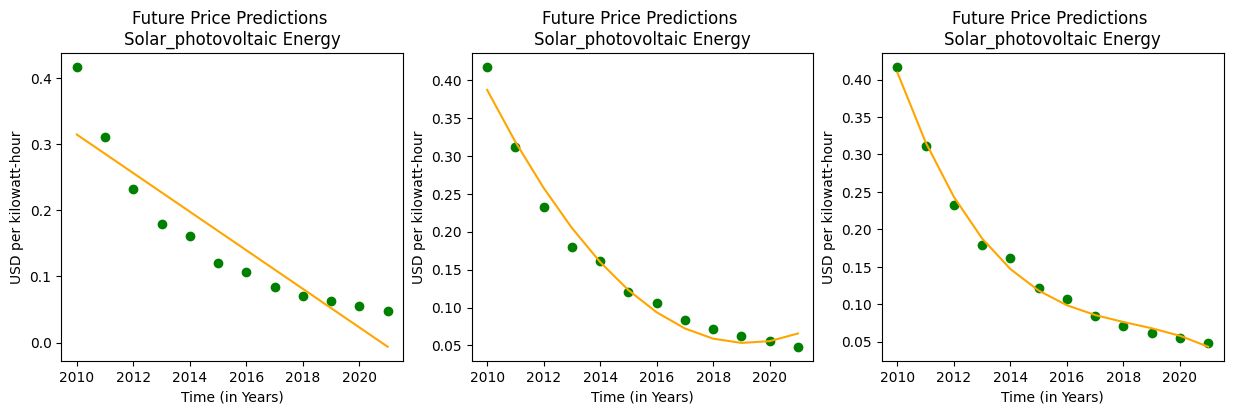

Poly Degree:  1
Price in 2025: [0.02369604]
MAE:  0.025573875716782556
r2:  0.8637977013230245
Poly Degree:  2
Price in 2025: [0.06955547]
MAE:  0.024922409031723308
r2:  0.8696254128610854
Poly Degree:  3
Price in 2025: [-0.11375418]
MAE:  0.024407001769213076
r2:  0.8811654528655046


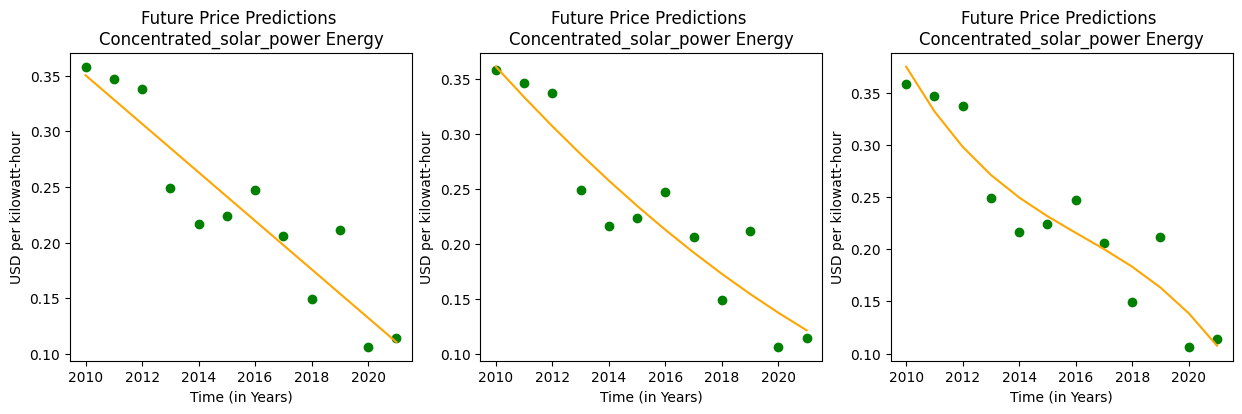

Poly Degree:  1
Price in 2025: [0.05027847]
MAE:  0.003014051562354328
r2:  0.37208920568939186
Poly Degree:  2
Price in 2025: [0.04757677]
MAE:  0.003028112278346614
r2:  0.37820448568364073
Poly Degree:  3
Price in 2025: [0.05087878]
MAE:  0.003009222044433805
r2:  0.37933661296269017


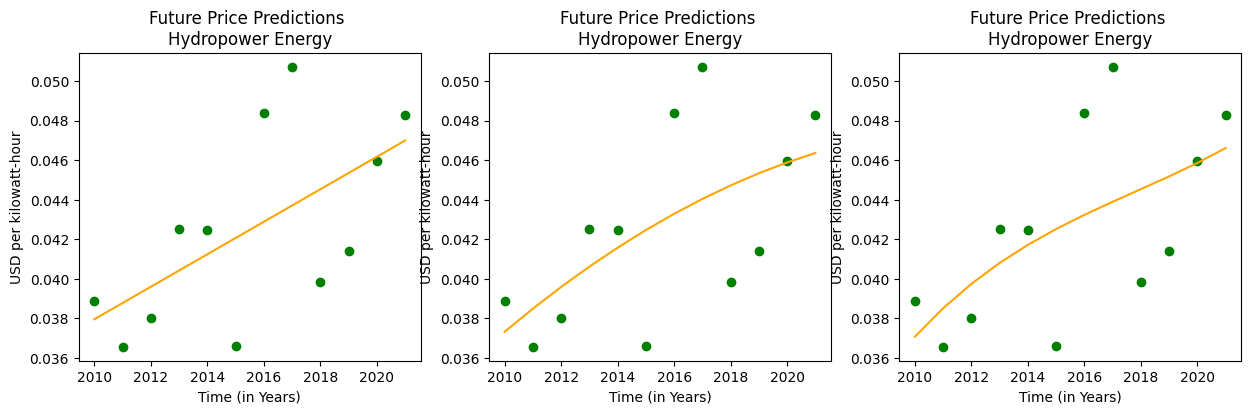

Poly Degree:  1
Price in 2025: [-0.00405333]
MAE:  0.015131150764476154
r2:  0.9355449687244377
Poly Degree:  2
Price in 2025: [0.03988013]
MAE:  0.011552746078152239
r2:  0.9613496231775871
Poly Degree:  3
Price in 2025: [-0.01354672]
MAE:  0.00838949355418997
r2:  0.9738608278063244


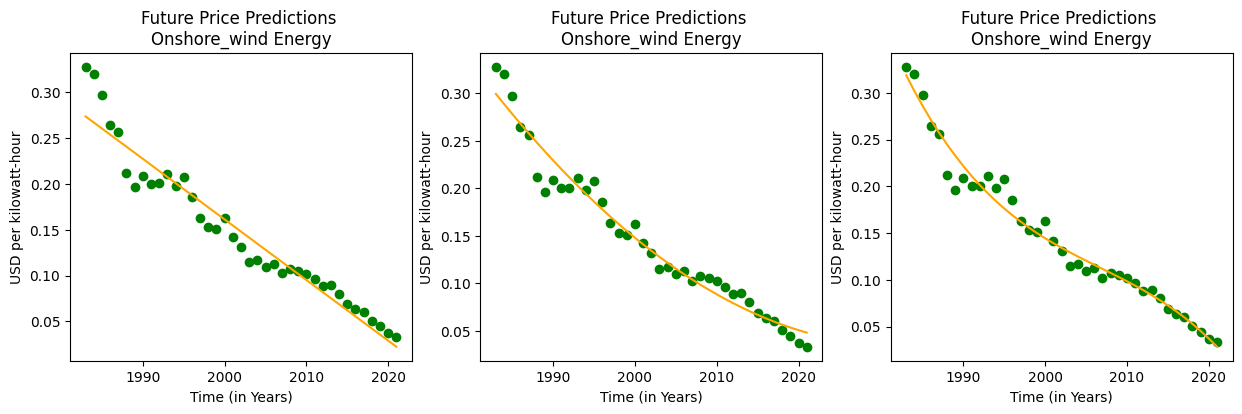

In [ ]:

#WITH POLYNOMIAL
#fitting Polynomial regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#Performing linear regression with PolynomialFeatures
def predict_the_future(enrg_type):
  df_test = df_cost_energy_world.loc[:,['Year',enrg_type]]
  df_test.dropna(inplace=True)
  df_test.reset_index(drop=True, inplace=True)
  first_year = df_test.loc[0,['Year']].values.tolist()[0]
  first_price = df_test.loc[0,[enrg_type]].values.tolist()[0]
  current_price = df_test.loc[len(df_test.index)-1,[enrg_type]].values.tolist()[0]


  #1 step need to create/setup X dataset
  #Setup X values in a two dimensional array
  X = df_test.iloc[:,0].values.reshape(-1,1)

  #2 step need to create/setup X,y dataset, Setup Y values is a single dimensional array_______________________________________________
  y = df_test.iloc[:,1].values

  fig, axs = plt.subplots(1,3,figsize=(15,4))

  #Creating a loop to show polynomial regression is three different degrees
  for i in [0,1,2]:
    poly_degree = i+1
    #4A define x_poly
    poly_reg = PolynomialFeatures(degree=poly_degree, include_bias=False)
    X_poly = poly_reg.fit_transform(X)

    #4 Apply Linear Regression (LR)
    pol_reg = LinearRegression()
    model = pol_reg.fit(X_poly,y)
    y_pred = pol_reg.predict(X_poly)

    print("Poly Degree: ",poly_degree)
    #Plotting y_pred data____________________________________________________________________________________________________________
    axs[i].plot(X,y,'o', color='green')
    axs[i].plot(X,y_pred, color='orange')
    axs[i].set_title('Future Price Predictions \n'+ enrg_type +' Energy')
    axs[i].set_xlabel('Time (in Years)')
    axs[i].set_ylabel('USD per kilowatt-hour')


    # LR model is using X(Years) to predict what the value of what Y(Price) will be
    F=2025
    X_future = poly_reg.fit_transform([[F]])
    y_pred_future = model.predict(X_future)
    print("Price in {}: {}".format(F, y_pred_future))

    #Importing mean absolute error________________________________________________________________________________________________
    #difference between the actual and predicted values on average.
    #In general, the lower the MAE, the better the model predicts.
    from sklearn.metrics import mean_absolute_error, r2_score

    mae_poly = mean_absolute_error(y, y_pred)
    print("MAE: ",mae_poly)
    r2_poly = r2_score(y, y_pred)
    print("r2: ",r2_poly)

  plt.show()
  plt.close(fig)


Power_Choice = ['Bioenergy', 'Geothermal', 'Offshore_wind',
       'Solar_photovoltaic', 'Concentrated_solar_power', 'Hydropower',
       'Onshore_wind']

for Power in Power_Choice:
  predict_the_future(Power)






---


# Creating Line Chart

---



In [ ]:
#Data for "RENEWABLE ENERGY PRICES OVER TIME"
df_energy_min_max

,Energy_Type,Min,Max,Min_Year
0,Bioenergy,0.08,0.07,2010
1,Geothermal,0.05,0.07,2007
2,Offshore_wind,0.17,0.08,2000
3,Solar_photovoltaic,0.42,0.05,2010
4,Concentrated_solar_power,0.36,0.11,2010
5,Hydropower,0.04,0.05,2010
6,Onshore_wind,0.33,0.03,1983


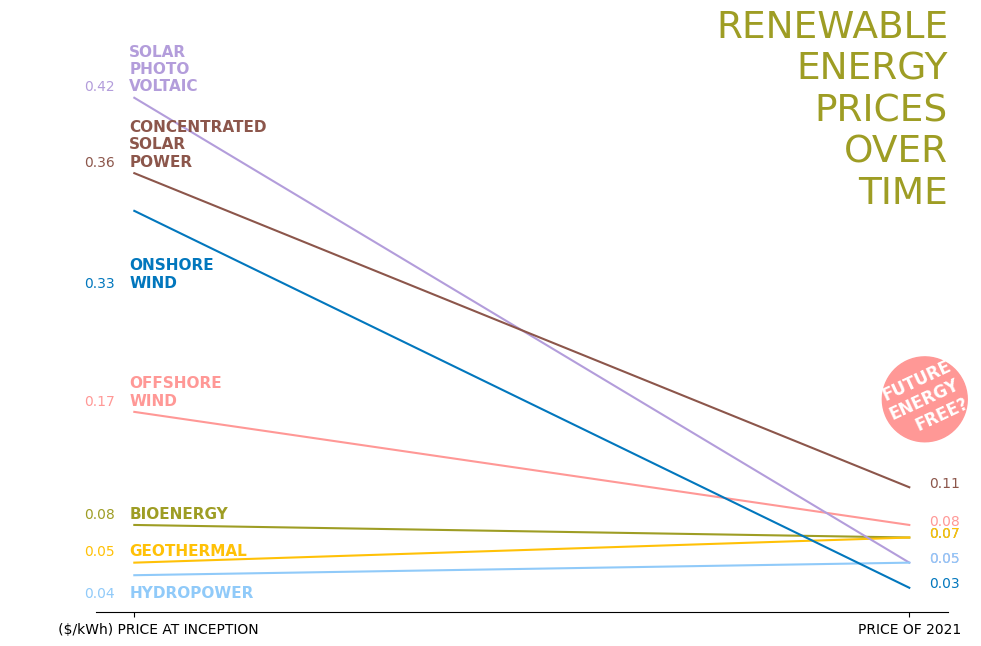

In [ ]:
from matplotlib import colors
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots(figsize=(11, 7))
x_energies = ['           ($/kWh) PRICE AT INCEPTION','PRICE OF 2021']
energies = {'Bioenergy': 'BIOENERGY', 'Geothermal': 'GEOTHERMAL','Offshore_wind': 'OFFSHORE\nWIND','Solar_photovoltaic':'SOLAR\nPHOTO\nVOLTAIC', 'Concentrated_solar_power': 'CONCENTRATED\nSOLAR\nPOWER', 'Hydropower':'HYDROPOWER','Onshore_wind': 'ONSHORE\nWIND'}
ax.set_prop_cycle(color=['#9E9D24','#FFC107','#ff9896',  '#B39DDB','#8c564b','#90CAF9', '#0277BD'])
ax.set_title('RENEWABLE\nENERGY\nPRICES\nOVER\nTIME',color='#9E9D24', family='sans-serif',weight="medium", fontsize=27, loc='right', y=1.0, pad=-94)

# Manually adjust the label positions vertically (units are points = 1/72 inch)
y_offsets = {k: 5 for k in energies}
y_offsets['Onshore_wind'] = -55
y_offsets['Hydropower'] = -16

# For loops to get plotpoints for each country
# row variable is used to interact with various column data such as ['Energy_Type':0, 'Min':1, 'Max':2, 'Min_Year':3]
for index, row in df_energy_min_max.iterrows():
  #The offset/trans is used to move 'Energy_Type' name
  offset = y_offsets[row[0]] / 72
  trans = mtransforms.ScaledTranslation(-0.05, offset, fig.dpi_scale_trans)
  trans = ax.transData + trans

  #The trans_left is used to move 'Min' prices
  trans_left = mtransforms.ScaledTranslation(-.5, offset, fig.dpi_scale_trans)
  trans_left = ax.transData + trans_left

  #The trans_right is used to move 'Max' prices
  trans_right = mtransforms.ScaledTranslation(0.2, 0, fig.dpi_scale_trans)
  trans_right = ax.transData + trans_right

  #line is a value with the the location and definition of the line plotted for each energy type
  line, = ax.plot(x_energies, row[1:3], label=row[0], lw=1.5)

  #ax.text allow for the control of where text is displayed in the chart
  ax.text(x_energies[0], row[1], energies[row[0]], color=line.get_color(),transform=trans, fontsize=11, weight="bold", family="sans-serif")
  ax.text(x_energies[0], row[1], row[1], color=line.get_color(), transform=trans_left, fontsize=10, family="sans-serif")
  ax.text(x_energies[1], row[2], row[2], color=line.get_color(), transform=trans_right, fontsize=10, family="sans-serif")

#This is how a sticker is created
plt.text(1.08, 0.18, "FUTURE\nENERGY\nFREE?", size=12, color='white', weight='bold',
         ha="right", va="center", rotation=25,
         bbox=dict(boxstyle="circle",
                   fc=('#ff9896'), ec=('#ff9896')
                   )
         )


# remove y-axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

plt.show()


---


# **> CHART C**

> The graph above shows a quick history of the prices of each renewable energy as is. It shows the dramatic price drop and almost makes you wonder... In the future, do some things come for free after all? Do you get a Solar panel with your tv?


   


---




---


# RESULTS

---




> The data used for this analysis has some variety in datapoints, making it challenging to get a more accurate result.  Onshore wind is the oldest energy source and has the most datapoints. The linear regression model showed a good fit and the score was sufficient to make predictions with a reduced error rate.

> Some renewables like Hydropower had a small number of datapoints and fluctuations in its prices. These factors make it harder to define a relationship using linear regression as the data curves. Polynomial regression made a better attempt fitting the model to the data by adding a number of degrees to bend the line towards the data.

> Some of the underfitting models improved with number of degrees and some were sensitive for overfitting. See the full scores with future prices in the table "OVERVIEW OF FUTURE PREDICTIONS". I have learned that sometimes where linear regression draws the line, Polynomial regression can take another swing at. However, the lack of available data and fluctuations overrule the attempts, resulting in a large error rate.  


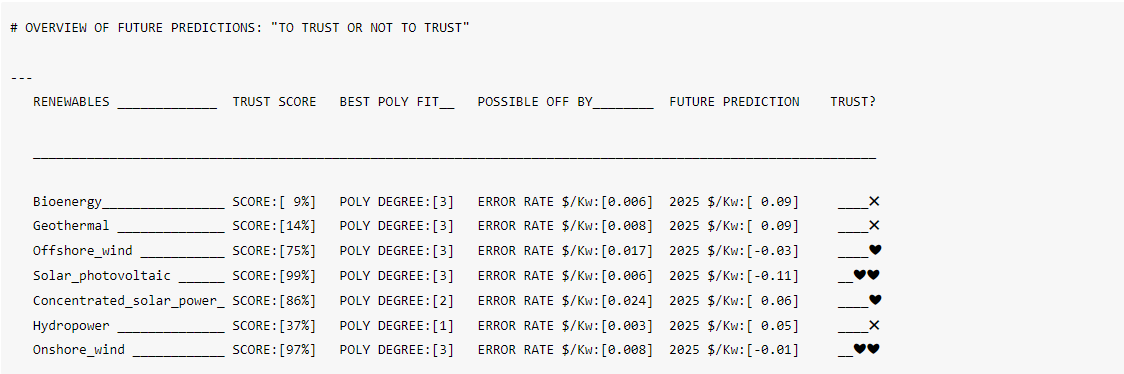

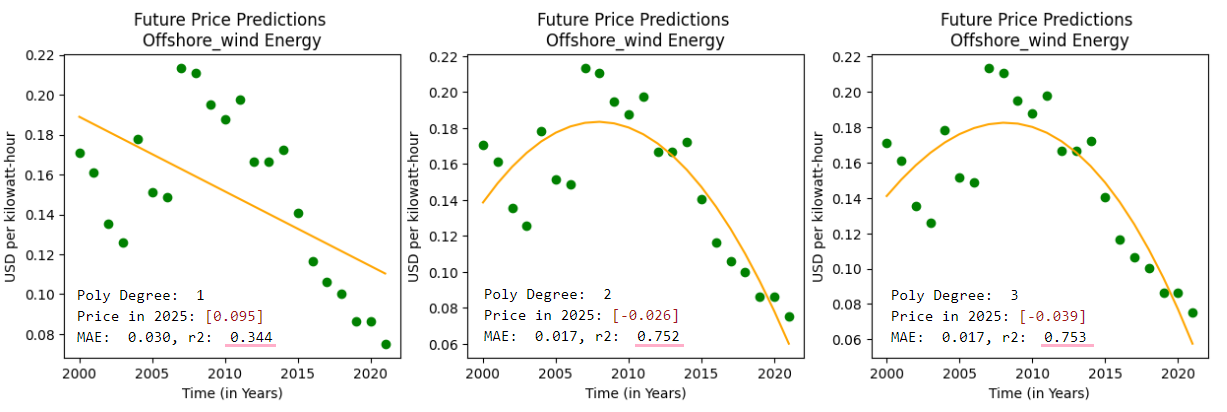

The strength of the prediction model increased for some of the renewables by changing the Poly degree from 1(linear) to 2 or 3(non-linear).

```
# > The effect of changing Poly degrees shown by the 3 "Offshore_wind" plots above:
    r2 increased from 34% to 75% for Poly 2 and 3.
    MAE (error rate) decreased from 0.030 to 0.017.
```




---


# CONCLUSION

---





> Offshore_wind, Concentrated_solar_power scored between 75% and 86% with trusting the models future predictions and has a error rate (between USD 0.03 and 0.11 KiloWatts). Onshore_wind and Solar_photovoltaic are scoring the least amount of error rate (between USD 0.006 and 0.008 KiloWatts) and model score (between 97% and 99%).
However, the remaining energy sources are young in their existence and have limited data. Those future prices are likely not to be trusted. Then at least we have the trustworthy predictions stating future price drops below 0. The probability is also low. Linear regression does not bend and therefore does not respect the bounds of 0. It is linear always and everywhere. Knowing this, any prediction below 0 is likely not valid as nothing comes for free. More likely the lower cost will allow for further investments into improving and enhancing the technology.




---


# SOURCES

---





```
  # BEST FUTURE PRICE SOURCE

  LEVELIZED_COST_OF_ENERGY
    Sourced from OWID: https://ourworldindata.org/grapher/levelized-cost-of-energy?tab=table on okt 2023 for this report.
      OWID sourced from: https://irena.org/publications/2022/Jul/Renewable-Power-Generation-Costs-in-2021
      Data published by International Renewable Energy Agency © IRENA 2022
      Retrieved by owid 2023-07-19

```





---


# REFERENCES

---





```
# Simple Linear Regression (SLR): Definition
Defines the relationship for the dependent variable y
for a single independent variable x.
The representation is a straight line.

Simple Linear regression is a Polynomial equation with a single degree.

```





```
# Polynomial Regression: Definition
Defines the relationship for the dependent variable y
and corresponding independent variables x as an nth degree polynomial.
Polynomial regression is a form of Linear regression
that is often used for fitting non-linear data.

Polynomial regression equation is a Linear equation with an nth degree.

```





```
  # Defining price measurment
    Levelized cost of energy (LCOE) estimates the average cost per unit of energy generated across the lifetime of a new power plant.
    It is measured in 2021 US$ per kilowatt-hour.
```



darkgreen.png